In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest

In [2]:
import pandas as pd
train=pd.read_csv(r"C:\Users\rajsi\Downloads\Restraurant (1)\Restraurant\train.csv")
train.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [3]:
test=pd.read_csv(r"C:\Users\rajsi\Downloads\Restraurant (1)\Restraurant\test.csv")
test.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,5.0,3.0,0,0,0,0,0,0,0,0


In [4]:
train.shape


(137, 43)

In [5]:
test.shape

(100000, 42)

In [6]:
print(train.dtypes)

Id              int64
Open Date      object
City           object
City Group     object
Type           object
P1              int64
P2            float64
P3            float64
P4            float64
P5              int64
P6              int64
P7              int64
P8              int64
P9              int64
P10             int64
P11             int64
P12             int64
P13           float64
P14             int64
P15             int64
P16             int64
P17             int64
P18             int64
P19             int64
P20             int64
P21             int64
P22             int64
P23             int64
P24             int64
P25             int64
P26           float64
P27           float64
P28           float64
P29           float64
P30             int64
P31             int64
P32             int64
P33             int64
P34             int64
P35             int64
P36             int64
P37             int64
revenue       float64
dtype: object


In [7]:
print(train.describe())


               Id          P1          P2          P3          P4          P5  \
count  137.000000  137.000000  137.000000  137.000000  137.000000  137.000000   
mean    68.000000    4.014599    4.408759    4.317518    4.372263    2.007299   
std     39.692569    2.910391    1.514900    1.032337    1.016462    1.209620   
min      0.000000    1.000000    1.000000    0.000000    3.000000    1.000000   
25%     34.000000    2.000000    4.000000    4.000000    4.000000    1.000000   
50%     68.000000    3.000000    5.000000    4.000000    4.000000    2.000000   
75%    102.000000    4.000000    5.000000    5.000000    5.000000    2.000000   
max    136.000000   12.000000    7.500000    7.500000    7.500000    8.000000   

               P6          P7          P8          P9  ...         P29  \
count  137.000000  137.000000  137.000000  137.000000  ...  137.000000   
mean     3.357664    5.423358    5.153285    5.445255  ...    3.135036   
std      2.134235    2.296809    1.858567    1.8

In [8]:
print(train.isnull().sum())

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64


In [9]:
print(test.dtypes)

Id              int64
Open Date      object
City           object
City Group     object
Type           object
P1              int64
P2            float64
P3            float64
P4            float64
P5              int64
P6              int64
P7              int64
P8              int64
P9              int64
P10             int64
P11             int64
P12             int64
P13           float64
P14             int64
P15             int64
P16             int64
P17             int64
P18             int64
P19             int64
P20             int64
P21             int64
P22             int64
P23             int64
P24             int64
P25             int64
P26           float64
P27           float64
P28           float64
P29           float64
P30             int64
P31             int64
P32             int64
P33             int64
P34             int64
P35             int64
P36             int64
P37             int64
dtype: object


In [10]:
print(test.describe())

                  Id             P1             P2             P3  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean    49999.500000       4.088030       4.428085       4.215325   
std     28867.657797       2.812963       1.428865       0.842161   
min         0.000000       1.000000       1.000000       0.000000   
25%     24999.750000       2.000000       3.750000       4.000000   
50%     49999.500000       3.000000       5.000000       4.000000   
75%     74999.250000       4.000000       5.000000       4.000000   
max     99999.000000      15.000000       7.500000       6.000000   

                  P4             P5             P6            P7  \
count  100000.000000  100000.000000  100000.000000  100000.00000   
mean        4.396025       1.989590       2.881900       5.30051   
std         1.035827       1.065314       1.531429       2.17858   
min         2.000000       1.000000       1.000000       1.00000   
25%         4.000000       1.000000   

In [11]:
print(test.isnull().sum())

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
dtype: int64


In [12]:
train

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,06/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,...,3.0,0,0,0,0,0,0,0,0,5787594.0
133,133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9262754.0
134,134,07/08/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2544857.0
135,135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,7217634.0


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\rajsi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


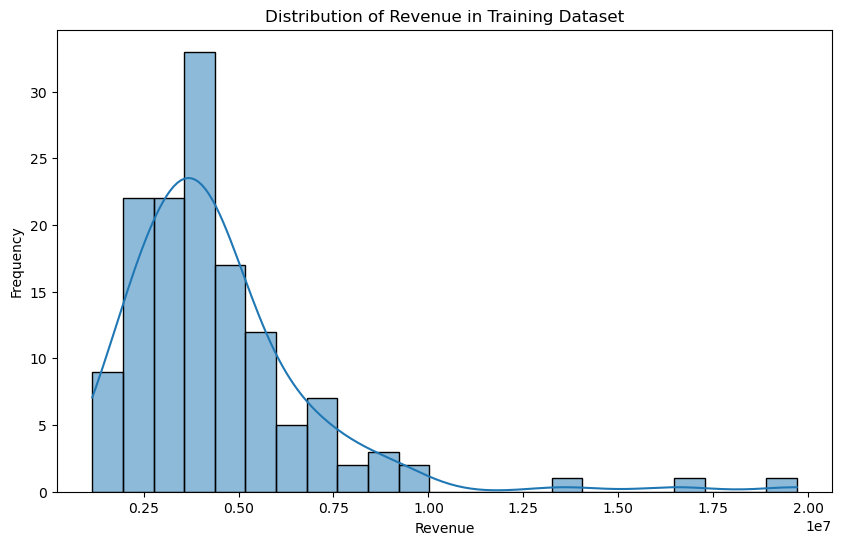

In [14]:
# Plot distribution of revenue
plt.figure(figsize=(10, 6))
sns.histplot(train['revenue'], kde=True)
plt.title('Distribution of Revenue in Training Dataset')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

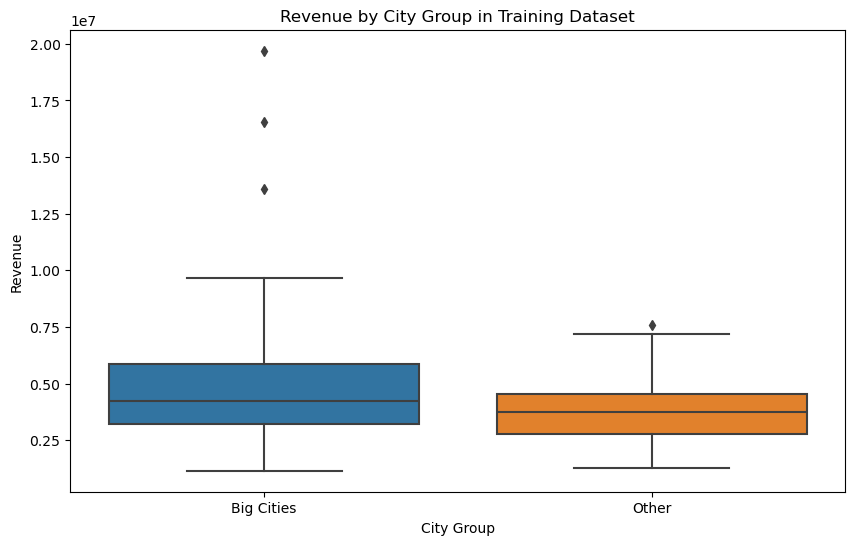

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='City Group', y='revenue', data=train)
plt.title('Revenue by City Group in Training Dataset')
plt.xlabel('City Group')
plt.ylabel('Revenue')
plt.show()

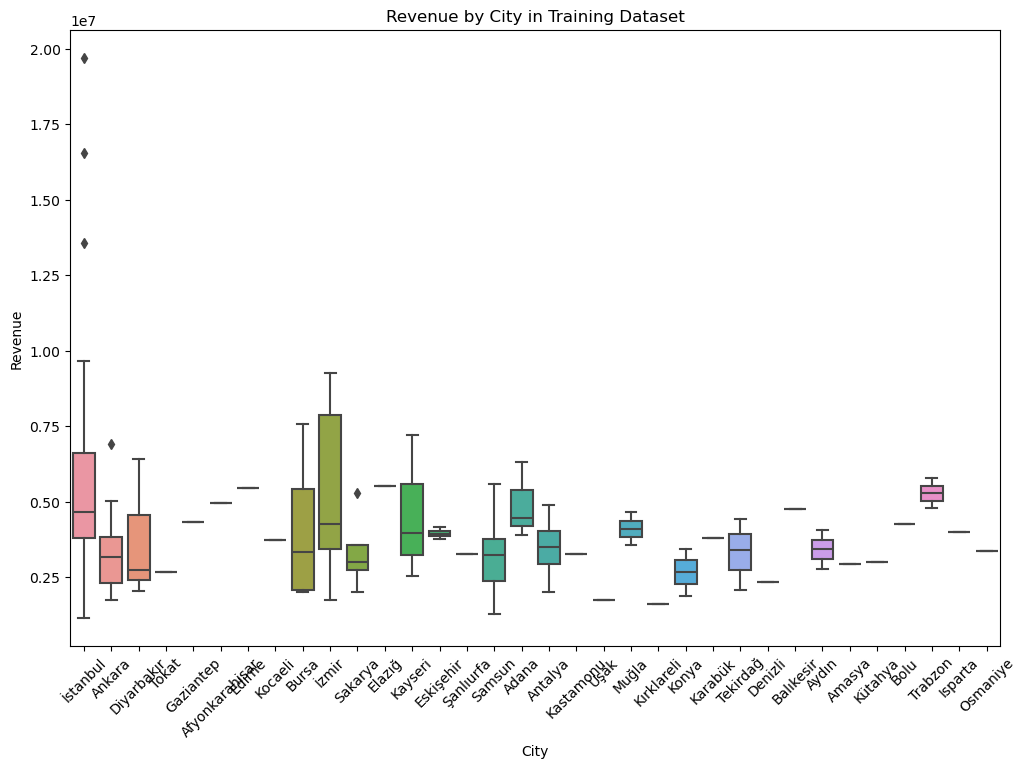

In [16]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='City', y='revenue', data=train)
plt.title('Revenue by City in Training Dataset')
plt.xlabel('City')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

In [17]:
train

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,06/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,...,3.0,0,0,0,0,0,0,0,0,5787594.0
133,133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9262754.0
134,134,07/08/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2544857.0
135,135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,7217634.0


C:\Users\rajsi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


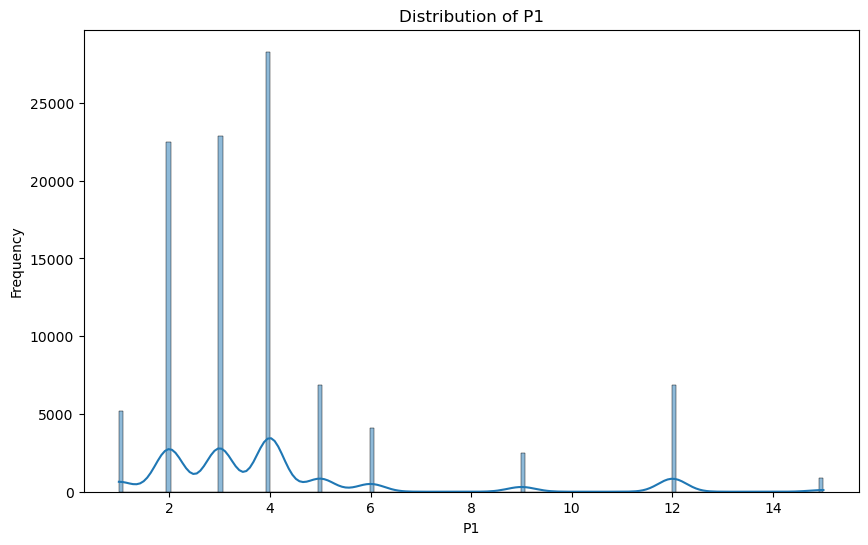

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(test['P1'], kde=True)
plt.title('Distribution of P1')
plt.xlabel('P1')
plt.ylabel('Frequency')
plt.show()

C:\Users\rajsi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


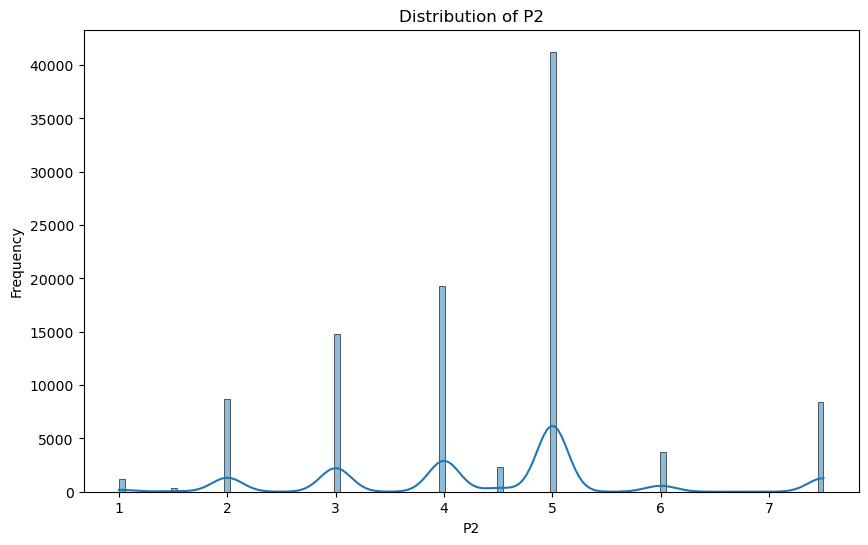

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(test['P2'], kde=True)
plt.title('Distribution of P2')
plt.xlabel('P2')
plt.ylabel('Frequency')
plt.show()

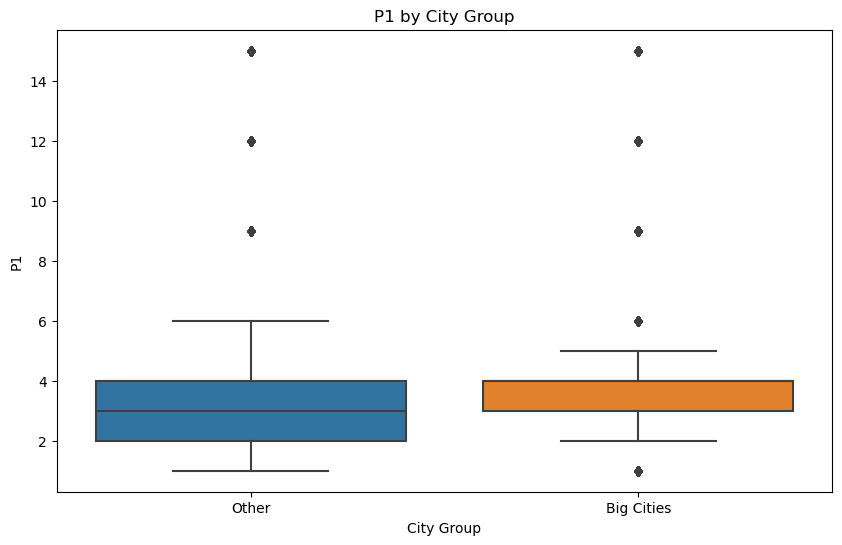

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='City Group', y='P1', data=test)
plt.title('P1 by City Group')
plt.xlabel('City Group')
plt.ylabel('P1')
plt.show()

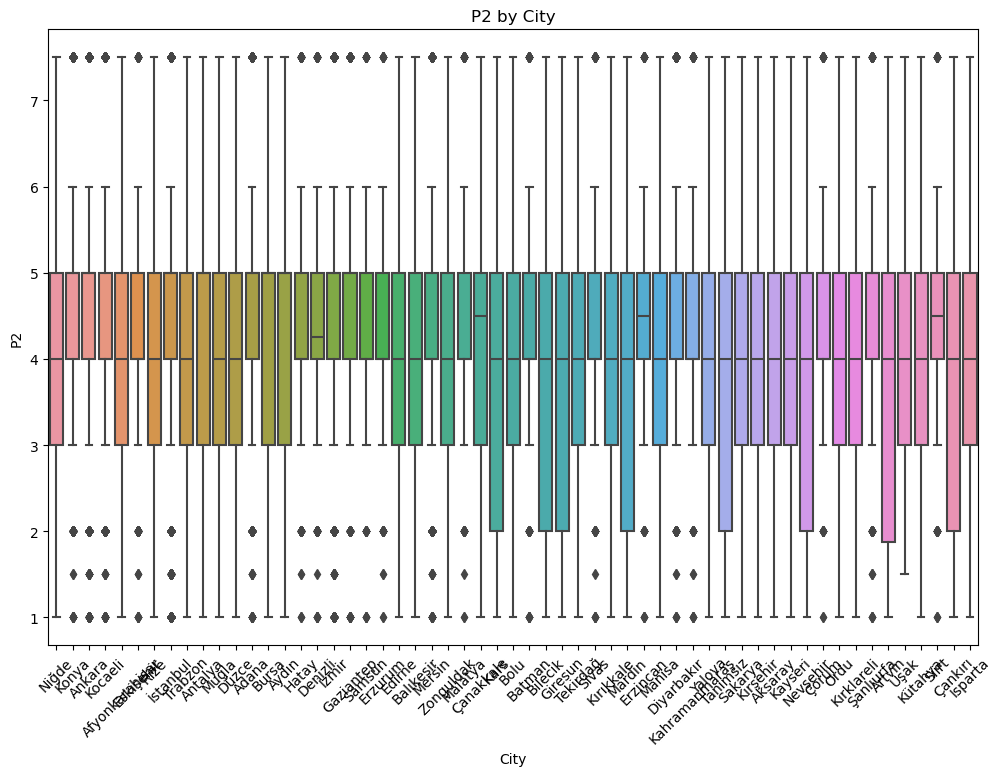

In [21]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='City', y='P2', data=test)
plt.title('P2 by City')
plt.xlabel('City')
plt.ylabel('P2')
plt.xticks(rotation=45)
plt.show()

In [22]:
train

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,06/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,...,3.0,0,0,0,0,0,0,0,0,5787594.0
133,133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9262754.0
134,134,07/08/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2544857.0
135,135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,7217634.0


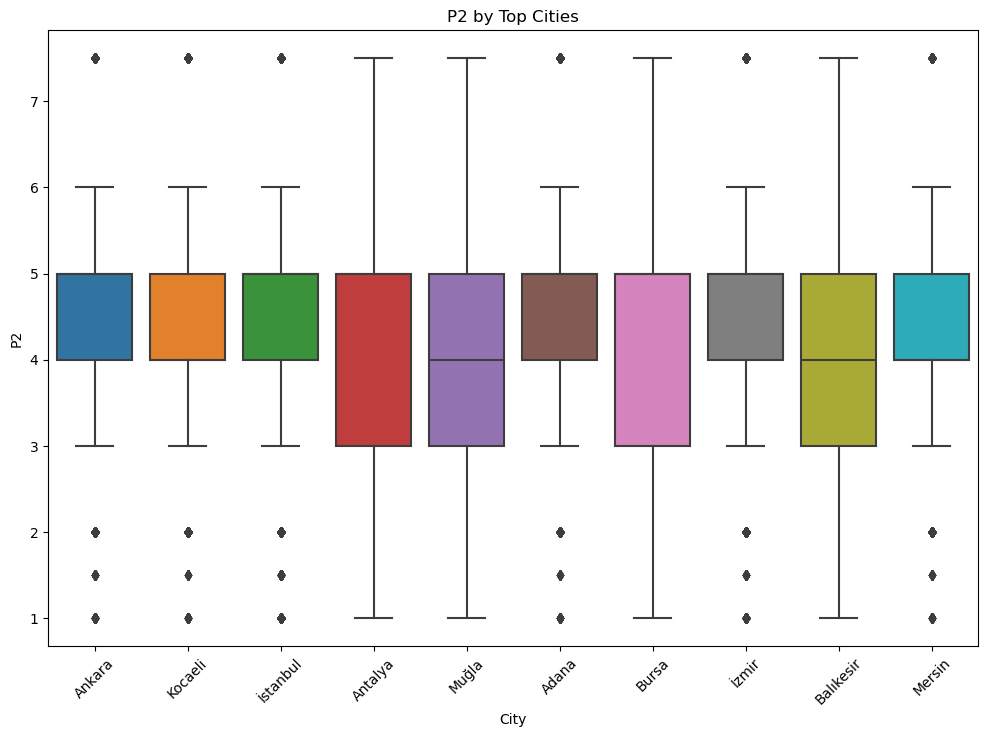

In [23]:
# Select top N cities by frequency
top_cities = test['City'].value_counts().head(10).index

# Filter the dataframe to include only top cities
df_filtered = test[test['City'].isin(top_cities)]

# Plot boxplot of P2 by City for top cities
plt.figure(figsize=(12, 8))
sns.boxplot(x='City', y='P2', data=df_filtered)
plt.title('P2 by Top Cities')
plt.xlabel('City')
plt.ylabel('P2')
plt.xticks(rotation=45)
plt.show()


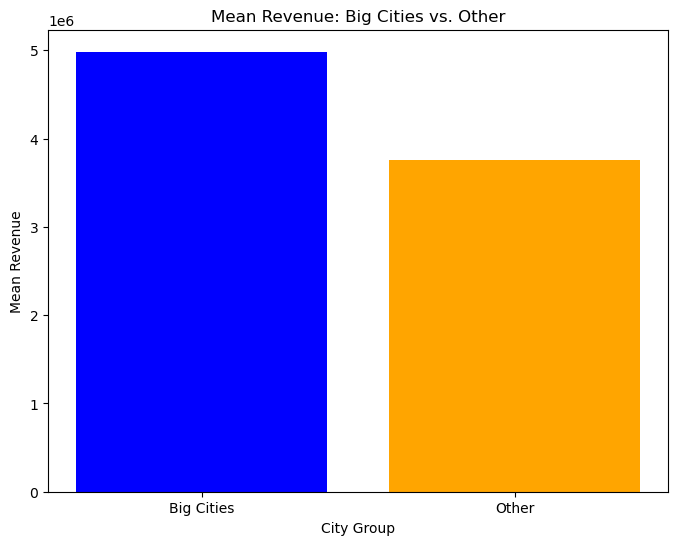

In [24]:
# Filter the DataFrame for "Big Cities" and "Other" categories
big_cities_data = train[train['City Group'] == 'Big Cities']
other_cities_data = train[train['City Group'] == 'Other']

# Calculate the mean revenue for each category
mean_revenue_big_cities = big_cities_data['revenue'].mean()
mean_revenue_other_cities = other_cities_data['revenue'].mean()

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(['Big Cities', 'Other'], [mean_revenue_big_cities, mean_revenue_other_cities], color=['blue', 'orange'])
plt.title('Mean Revenue: Big Cities vs. Other')
plt.xlabel('City Group')
plt.ylabel('Mean Revenue')
plt.show()


In [25]:
train

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,06/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,...,3.0,0,0,0,0,0,0,0,0,5787594.0
133,133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9262754.0
134,134,07/08/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2544857.0
135,135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,7217634.0


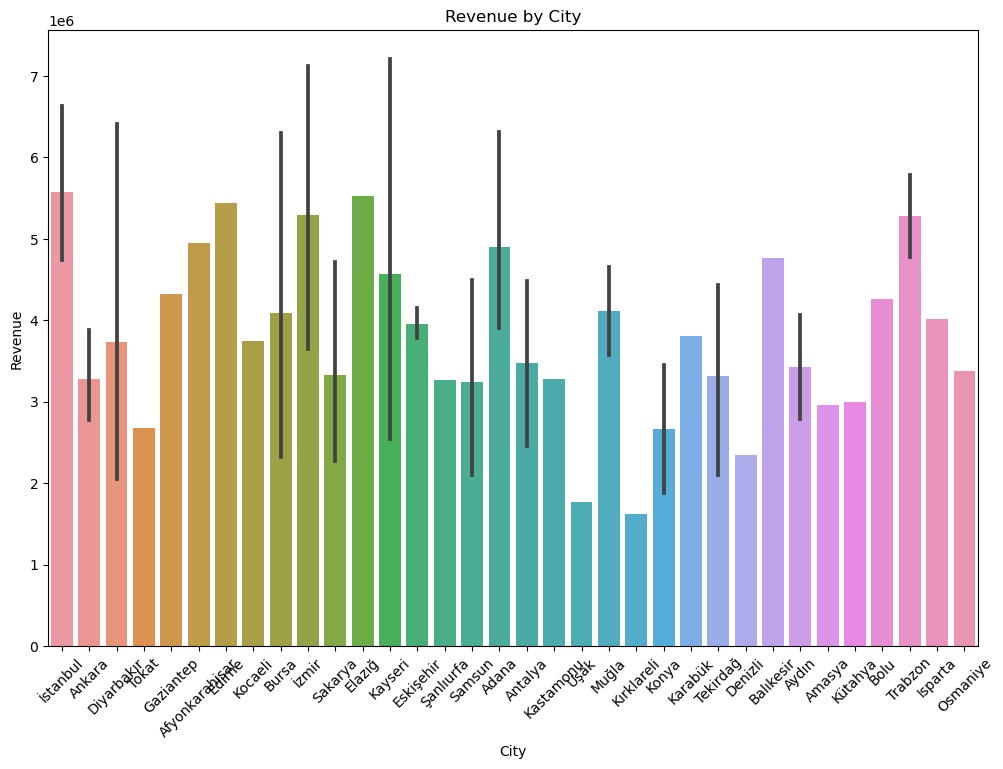

In [26]:
# Plot bar plot of revenue by city
plt.figure(figsize=(12, 8))
sns.barplot(x='City', y='revenue', data=train)
plt.title('Revenue by City')
plt.xlabel('City')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()


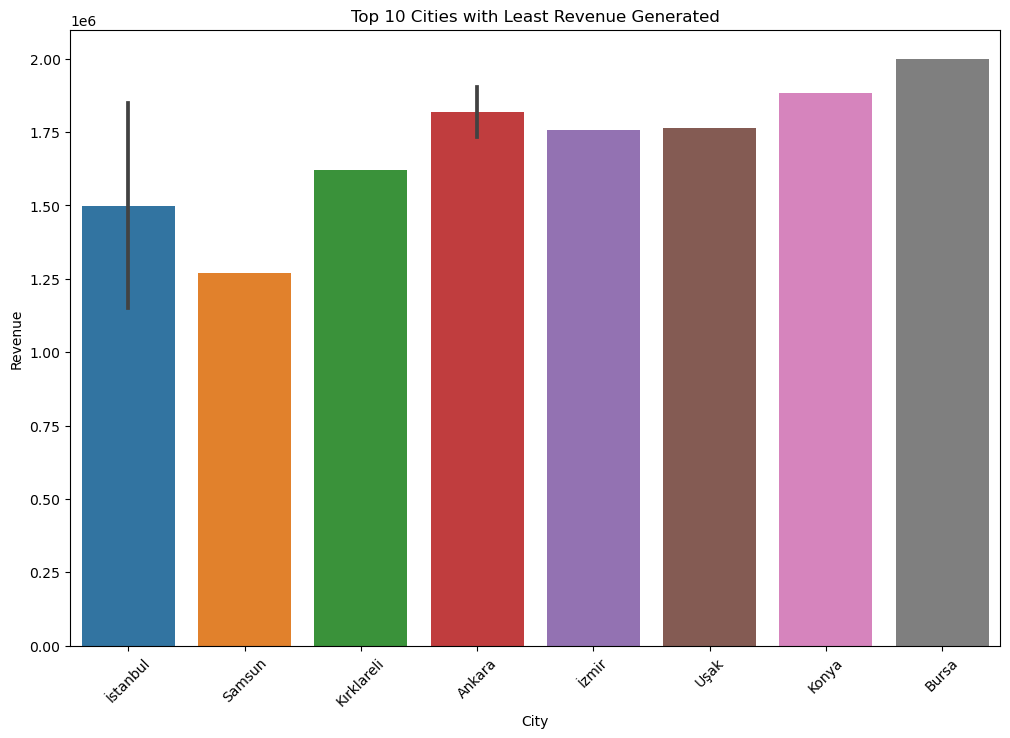

In [27]:
# Sort the DataFrame by revenue in ascending order
sorted_by_revenue = train.sort_values(by='revenue')

# Select the top 10 cities with the least revenue generated
top_10_least_revenue_cities = sorted_by_revenue.head(10)

# Plot bar plot of revenue by city for the top 10 least revenue generated cities
plt.figure(figsize=(12, 8))
sns.barplot(x='City', y='revenue', data=top_10_least_revenue_cities)
plt.title('Top 10 Cities with Least Revenue Generated')
plt.xlabel('City')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()


In [28]:
train

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,06/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,...,3.0,0,0,0,0,0,0,0,0,5787594.0
133,133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9262754.0
134,134,07/08/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2544857.0
135,135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,7217634.0


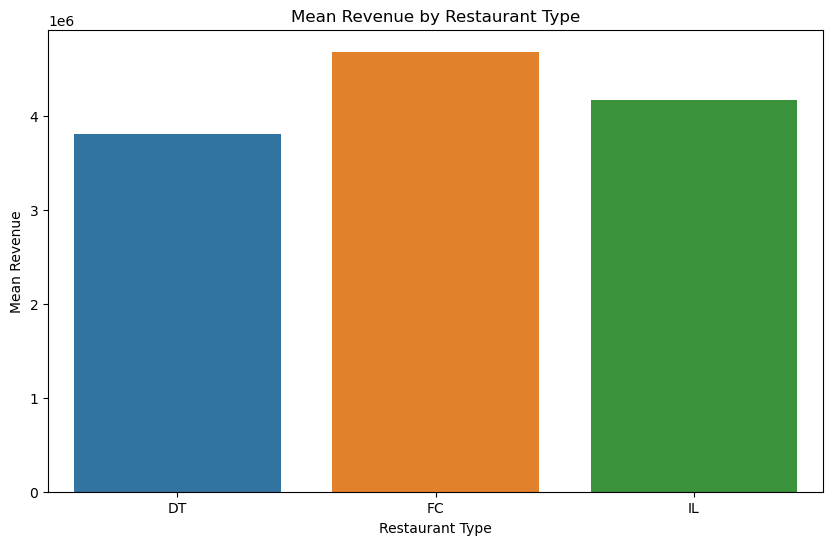

In [29]:
# Group the DataFrame by restaurant type and calculate the mean revenue for each type
mean_revenue_by_type = train.groupby('Type')['revenue'].mean().reset_index()

# Plot bar plot of mean revenue by restaurant type
plt.figure(figsize=(10, 6))
sns.barplot(x='Type', y='revenue', data=mean_revenue_by_type)
plt.title('Mean Revenue by Restaurant Type')
plt.xlabel('Restaurant Type')
plt.ylabel('Mean Revenue')
plt.show()


In [30]:
train

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,06/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,...,3.0,0,0,0,0,0,0,0,0,5787594.0
133,133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9262754.0
134,134,07/08/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2544857.0
135,135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,7217634.0


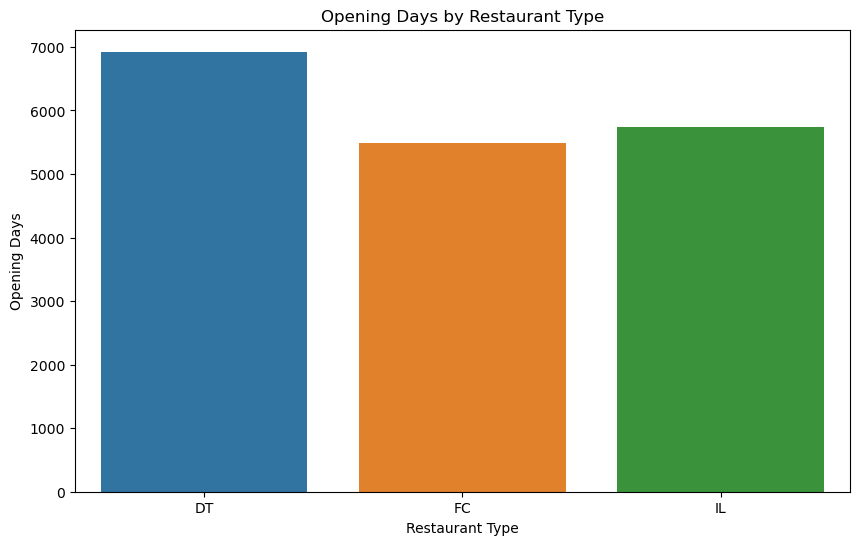

In [31]:
# Group the DataFrame by restaurant type and calculate the mean opening days for each type
mean_opening_days_by_type = train.groupby('Type')['Open Date'].agg(lambda x: (pd.Timestamp.now() - pd.to_datetime(x)).mean().days).reset_index()
mean_opening_days_by_type.rename(columns={'Open Date': 'Opening Days'}, inplace=True)

# Plot bar plot of mean opening days by restaurant type
plt.figure(figsize=(10, 6))
sns.barplot(x='Type', y='Opening Days', data=mean_opening_days_by_type)
plt.title('Opening Days by Restaurant Type')
plt.xlabel('Restaurant Type')
plt.ylabel('Opening Days')
plt.show()


In [32]:
train

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,06/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,...,3.0,0,0,0,0,0,0,0,0,5787594.0
133,133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9262754.0
134,134,07/08/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2544857.0
135,135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,7217634.0


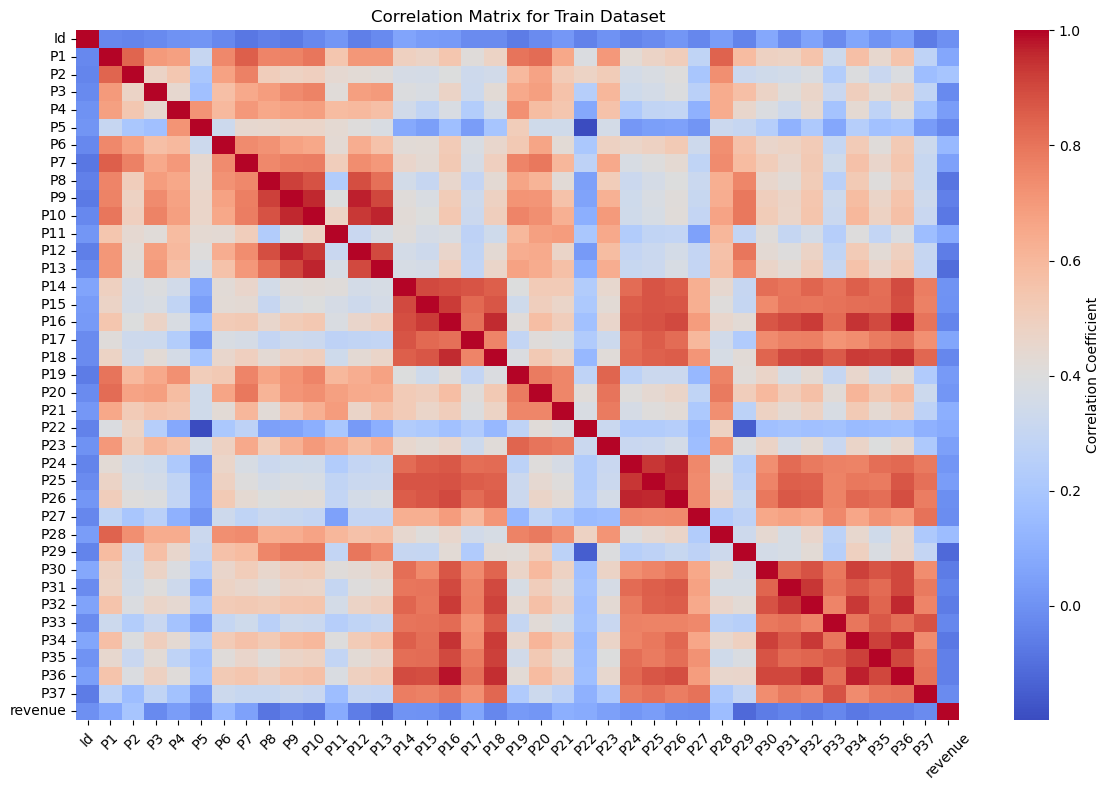

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only the numeric columns for correlation matrix
numeric_data = train.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the correlation matrix using a heatmap without numerical values
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix for Train Dataset')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only the numeric columns for correlation matrix
numeric_data = train.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Check if 'revenue' is in the numeric columns
if 'revenue' in correlation_matrix.columns:
    # Sort the correlation values of the 'revenue' column in descending order
    correlation_with_revenue = correlation_matrix['revenue'].sort_values(ascending=False)
    
    # Print the sorted correlation values
    print(correlation_with_revenue)
else:
    print("'revenue' column is not in the numeric data. Please check your dataset.")


revenue    1.000000
P2         0.191518
P28        0.155534
P6         0.139094
P21        0.097411
P11        0.084247
P22        0.083562
P1         0.070217
P17        0.067137
P7         0.051165
P23        0.045507
P25        0.036365
P4         0.035685
P19        0.027984
P24        0.014222
P20        0.014147
P14        0.006441
P15        0.000742
Id        -0.006277
P26       -0.007650
P27       -0.013680
P37       -0.019051
P3        -0.024613
P5        -0.028191
P33       -0.032426
P18       -0.034537
P16       -0.037997
P31       -0.040418
P35       -0.050156
P9        -0.050352
P36       -0.050534
P12       -0.062193
P32       -0.065857
P30       -0.066203
P34       -0.072343
P10       -0.073220
P8        -0.084215
P13       -0.105085
P29       -0.114846
Name: revenue, dtype: float64


In [35]:
train = train.drop('Open Date',axis=1)
train = train.drop('Id', axis=1)
train.head(5)

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [36]:
citygroupDummyTrain = pd.get_dummies(train['City Group'])
train = train.join(citygroupDummyTrain)

In [37]:
train = train.drop ('City Group',axis=1)
train.head()

,City,Type,P1,P2,P3,P4,P5,P6,P7,P8,...,P31,P32,P33,P34,P35,P36,P37,revenue,Big Cities,Other
0,İstanbul,IL,4,5.0,4.0,4.0,2,2,5,4,...,3,4,5,5,4,3,4,5653753.0,True,False
1,Ankara,FC,4,5.0,4.0,4.0,1,2,5,5,...,0,0,0,0,0,0,0,6923131.0,True,False
2,Diyarbakır,IL,2,4.0,2.0,5.0,2,3,5,5,...,0,0,0,0,0,0,0,2055379.0,False,True
3,Tokat,IL,6,4.5,6.0,6.0,4,4,10,8,...,12,10,6,18,12,12,6,2675511.0,False,True
4,Gaziantep,IL,3,4.0,3.0,4.0,2,2,5,5,...,1,3,2,3,4,3,3,4316715.0,False,True


In [38]:
citygroupDummyTest = pd.get_dummies(test['City Group'])
test = test.join(citygroupDummyTrain)

In [39]:
test = test.drop ('City Group',axis=1)
test.head()

,Id,Open Date,City,Type,P1,P2,P3,P4,P5,P6,...,P30,P31,P32,P33,P34,P35,P36,P37,Big Cities,Other
0,0,01/22/2011,Niğde,FC,1,4.0,4.0,4.0,1,2,...,0,0,0,0,0,0,0,0,True,False
1,1,03/18/2011,Konya,IL,3,4.0,4.0,4.0,2,2,...,0,0,0,0,0,0,0,0,True,False
2,2,10/30/2013,Ankara,FC,3,4.0,4.0,4.0,2,2,...,0,0,0,0,0,0,0,0,False,True
3,3,05/06/2013,Kocaeli,IL,2,4.0,4.0,4.0,2,3,...,0,4,0,0,0,0,0,0,False,True
4,4,07/31/2013,Afyonkarahisar,FC,2,4.0,4.0,4.0,1,2,...,0,0,0,0,0,0,0,0,False,True


Data preprocessing for data

In [40]:
import pandas as pd

# Assuming df is your DataFrame containing the data
# Drop rows with NaN values
test_cl = test.dropna()

# Display the cleaned DataFrame
print(test_cl)


      Id   Open Date            City Type  P1   P2   P3   P4  P5  P6  ...  \
0      0  01/22/2011           Niğde   FC   1  4.0  4.0  4.0   1   2  ...   
1      1  03/18/2011           Konya   IL   3  4.0  4.0  4.0   2   2  ...   
2      2  10/30/2013          Ankara   FC   3  4.0  4.0  4.0   2   2  ...   
3      3  05/06/2013         Kocaeli   IL   2  4.0  4.0  4.0   2   3  ...   
4      4  07/31/2013  Afyonkarahisar   FC   2  4.0  4.0  4.0   1   2  ...   
..   ...         ...             ...  ...  ..  ...  ...  ...  ..  ..  ...   
132  132  03/07/2010        İstanbul   FC   4  5.0  4.0  4.0   1   5  ...   
133  133  03/14/2012          Mardin   IL   3  4.0  4.0  4.0   1   2  ...   
134  134  04/14/2009       Balıkesir   IL   6  6.0  6.0  6.0   4   2  ...   
135  135  04/04/2008         Denizli   FC   3  4.0  6.0  4.0   2   4  ...   
136  136  06/24/2012          Samsun   IL   4  4.0  4.0  4.0   1   2  ...   

     P30  P31  P32  P33  P34  P35  P36  P37  Big Cities  Other  
0      0  

In [41]:
import pandas as pd

# Assuming df is your DataFrame containing the data
# Drop rows with NaN values
train_cl = train.dropna()

# Display the cleaned DataFrame
print(train_cl)


           City Type  P1   P2   P3   P4  P5  P6  P7  P8  ...  P31  P32  P33  \
0      İstanbul   IL   4  5.0  4.0  4.0   2   2   5   4  ...    3    4    5   
1        Ankara   FC   4  5.0  4.0  4.0   1   2   5   5  ...    0    0    0   
2    Diyarbakır   IL   2  4.0  2.0  5.0   2   3   5   5  ...    0    0    0   
3         Tokat   IL   6  4.5  6.0  6.0   4   4  10   8  ...   12   10    6   
4     Gaziantep   IL   3  4.0  3.0  4.0   2   2   5   5  ...    1    3    2   
..          ...  ...  ..  ...  ...  ...  ..  ..  ..  ..  ...  ...  ...  ...   
132     Trabzon   FC   2  3.0  3.0  5.0   4   2   4   4  ...    0    0    0   
133       İzmir   FC   4  5.0  4.0  4.0   2   3   5   4  ...    0    0    0   
134     Kayseri   FC   3  4.0  4.0  4.0   2   3   5   5  ...    0    0    0   
135    İstanbul   FC   4  5.0  4.0  5.0   2   2   5   5  ...    0    0    0   
136    İstanbul   FC   4  5.0  3.0  5.0   2   2   5   4  ...    0    0    0   

     P34  P35  P36  P37    revenue  Big Cities  Oth

In [42]:
import numpy
xTrain = pd.DataFrame({
                       'Big Cities':train_cl['Big Cities'],'Other':train_cl['Other'],
                       'P1':train_cl['P1'],'P2':train_cl['P2'],'P3':train_cl['P3'],'P4':train_cl['P4'],'P5':train_cl['P5'],
                       'P6':train_cl['P6'],'P7':train_cl['P7'],'P8':train_cl['P8'],'P9':train_cl['P9'],'P10':train_cl['P10'],
                       'P11':train_cl['P11'],'P12':train_cl['P12'],'P13':train_cl['P13'],'P14':train_cl['P14'],'P15':train_cl['P15'],
                       'P16':train_cl['P16'],'P17':train_cl['P17'],'P18':train_cl['P18'],'P19':train_cl['P19'],'P20':train_cl['P20'],
                       'P21':train_cl['P21'],'P22':train_cl['P22'],'P23':train_cl['P23'],'P24':train_cl['P24'],'P25':train_cl['P25'],
                       'P26':train_cl['P26'],'P27':train_cl['P27'],'P28':train_cl['P28'],'P29':train_cl['P29'],'P30':train_cl['P30'],'P31':train_cl['P31'],'P32':train_cl['P32'],'P33':train_cl['P33'],
                       'P34':train_cl['P34'],'P35':train_cl['P35'],'P36':train_cl['P36'],'P37':train_cl['P37']})





In [43]:
yTrain = train['revenue'].apply(numpy.log)
xTest = pd.DataFrame({ 
                       'Big Cities':test_cl['Big Cities'],'Other':test_cl['Other'],
                       'P1':test_cl['P1'],'P2':test_cl['P2'],'P3':test_cl['P3'],'P4':test_cl['P4'],'P5':test_cl['P5'],
                       'P6':test_cl['P6'],'P7':test_cl['P7'],'P8':test_cl['P8'],'P9':test_cl['P9'],'P10':test_cl['P10'],
                       'P11':test_cl['P11'],'P12':test_cl['P12'],'P13':test_cl['P13'],'P14':test_cl['P14'],'P15':test_cl['P15'],
                       'P16':test_cl['P16'],'P17':test_cl['P17'],'P18':test_cl['P18'],'P19':test_cl['P19'],'P20':test_cl['P20'],
                       'P21':test_cl['P21'],'P22':test_cl['P22'],'P23':test_cl['P23'],'P24':test_cl['P24'],'P25':test_cl['P25'],
                       'P26':test_cl['P26'],'P27':test_cl['P27'],'P28':test_cl['P28'],'P29':test_cl['P29'],'P30':test_cl['P30'],'P31':test_cl['P31'],'P32':test_cl['P32'],'P33':test_cl['P33'],
                       'P34':test_cl['P34'],'P35':test_cl['P35'],'P36':test_cl['P36'],'P37':test_cl['P37']})




In [44]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler(with_std = True, with_mean = True, copy= True)
xTrain= sc.fit_transform(xTrain)
xTest= sc.transform(xTest)

In [45]:
train

,City,Type,P1,P2,P3,P4,P5,P6,P7,P8,...,P31,P32,P33,P34,P35,P36,P37,revenue,Big Cities,Other
0,İstanbul,IL,4,5.0,4.0,4.0,2,2,5,4,...,3,4,5,5,4,3,4,5653753.0,True,False
1,Ankara,FC,4,5.0,4.0,4.0,1,2,5,5,...,0,0,0,0,0,0,0,6923131.0,True,False
2,Diyarbakır,IL,2,4.0,2.0,5.0,2,3,5,5,...,0,0,0,0,0,0,0,2055379.0,False,True
3,Tokat,IL,6,4.5,6.0,6.0,4,4,10,8,...,12,10,6,18,12,12,6,2675511.0,False,True
4,Gaziantep,IL,3,4.0,3.0,4.0,2,2,5,5,...,1,3,2,3,4,3,3,4316715.0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Trabzon,FC,2,3.0,3.0,5.0,4,2,4,4,...,0,0,0,0,0,0,0,5787594.0,False,True
133,İzmir,FC,4,5.0,4.0,4.0,2,3,5,4,...,0,0,0,0,0,0,0,9262754.0,True,False
134,Kayseri,FC,3,4.0,4.0,4.0,2,3,5,5,...,0,0,0,0,0,0,0,2544857.0,False,True
135,İstanbul,FC,4,5.0,4.0,5.0,2,2,5,5,...,0,0,0,0,0,0,0,7217634.0,True,False


In [46]:
test

,Id,Open Date,City,Type,P1,P2,P3,P4,P5,P6,...,P30,P31,P32,P33,P34,P35,P36,P37,Big Cities,Other
0,0,01/22/2011,Niğde,FC,1,4.0,4.0,4.0,1,2,...,0,0,0,0,0,0,0,0,True,False
1,1,03/18/2011,Konya,IL,3,4.0,4.0,4.0,2,2,...,0,0,0,0,0,0,0,0,True,False
2,2,10/30/2013,Ankara,FC,3,4.0,4.0,4.0,2,2,...,0,0,0,0,0,0,0,0,False,True
3,3,05/06/2013,Kocaeli,IL,2,4.0,4.0,4.0,2,3,...,0,4,0,0,0,0,0,0,False,True
4,4,07/31/2013,Afyonkarahisar,FC,2,4.0,4.0,4.0,1,2,...,0,0,0,0,0,0,0,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,01/05/2000,Antalya,FC,5,5.0,4.0,4.0,2,2,...,0,0,0,0,0,0,0,0,NaN,NaN
99996,99996,07/18/2011,Niğde,IL,1,2.0,4.0,3.0,1,1,...,5,0,0,0,4,0,0,0,NaN,NaN
99997,99997,12/29/2012,İstanbul,IL,4,5.0,4.0,4.0,1,2,...,5,5,3,2,4,4,4,2,NaN,NaN
99998,99998,10/12/2013,İstanbul,FC,12,7.5,6.0,6.0,4,4,...,0,0,0,4,0,0,0,0,NaN,NaN


# Model- Linear Regression

In [47]:
from sklearn import linear_model

regr = linear_model.LinearRegression()

regr.fit(xTrain,yTrain)

linear_predictions = regr.predict(xTest)

linear_predictions

array([15.42813645, 14.95780693, 14.91598678, 15.47578441, 15.65809308,
       15.58603734, 15.6789189 , 15.48456674, 16.23029318, 15.15649091,
       17.0479761 , 15.34831859, 15.07549964, 16.05358165, 15.67295615,
       15.49644008, 16.00020293, 14.83192662, 14.75742508, 15.59580831,
       15.26266205, 14.30398252, 14.71613247, 14.71643096, 16.40796181,
       15.61163788, 14.65336291, 15.82939596, 14.96742658, 16.06181754,
       19.11608819, 13.95214003, 14.77240761, 14.74119661, 14.97874748,
       15.07066699, 15.33959005, 17.24808641, 14.73632031, 14.03483084,
       16.53132514, 15.34474778, 17.1321799 , 15.2291647 , 14.33852561,
       15.0587419 , 15.87100882, 13.23454359, 14.27635437, 15.33726521,
       15.10933038, 16.11941113, 15.24810107, 15.0676874 , 14.99015449,
       16.01210504, 16.47574376, 14.97165717, 15.23107655, 14.45500201,
       15.55101918, 15.05335855, 14.27515731, 15.15269418, 16.06238516,
       15.11009813, 15.03604119, 15.13648399, 14.79204527, 15.02

In [48]:
regr.score(xTrain,yTrain)

0.3126496748535552

# RandomForestRegresson

In [49]:
forest = RandomForestRegressor(n_estimators=500)
forest.fit(xTrain,yTrain)

RandomForestRegressor(n_estimators=500)

In [50]:
pred=forest.predict(xTest)
pred=numpy.exp(pred)
scoreofModel=forest.score(xTrain,yTrain)
print("Score is calcculated as:",scoreofModel)

Score is calcculated as: 0.8569829581578582


In [51]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [52]:
import xgboost as xgb
best_xgb_model = xgb.XGBRegressor(colsample_bytree=0.4,gamma=0,learning_rate=0.07,
                                 max_depth=3,
                                 minn_child_weight=1.5,
                                 n_estimators=10000,
                                 reg_alpha=0.75,
                                 reg_lambda=0.45,
                                 subsample=0.6,
                                 speed=42)
xgbr=best_xgb_model.fit(xTrain,yTrain)

C:\Users\rajsi\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [01:55:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "minn_child_weight", "speed" } are not used.

  warnings.warn(smsg, UserWarning)


In [53]:
xgbrscoreofModel=xgbr.score(xTrain,yTrain)
print("Score is calculated as:",xgbrscoreofModel)

Score is calculated as: 0.9611935842222522


In [54]:
from sklearn.tree import DecisionTreeRegressor

# Assuming you have imported necessary libraries like numpy, pandas, etc.
# Assuming xTrain, yTrain, xTest are defined and imported properly

# Create Decision Tree Regressor
decision_tree = DecisionTreeRegressor()

# Fit the model
decision_tree.fit(xTrain, yTrain)

# Make predictions
pred = decision_tree.predict(xTest)

# Score of the model
score_of_model = decision_tree.score(xTrain, yTrain)
print("Score is calculated as:", score_of_model)


Score is calculated as: 0.9738229890068358


In [55]:
from sklearn.svm import SVR

# Train the SVR model
svr_model = SVR(kernel='rbf')  # RBF kernel is commonly used for SVM regression
svr_model.fit(xTrain, yTrain)

# Make predictions
svm_predictions = svr_model.predict(xTest)

# Optionally, calculate the score of the SVR model
svm_score = svr_model.score(xTrain, yTrain)
print("Score is calculated as:", svm_score)


Score is calculated as: 0.47916146726936426


In [56]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [57]:
import lightgbm as lgb

# Create LightGBM regressor model
lgb_regressor = lgb.LGBMRegressor()

# Train the model
lgb_regressor.fit(xTrain, yTrain)

# Make predictions
lgb_predictions = lgb_regressor.predict(xTest)

# Score of the model
lgb_score = lgb_regressor.score(xTrain, yTrain)
print("Score is calculated as:", lgb_score)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000038 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 294
[LightGBM] [Info] Number of data points in the train set: 137, number of used features: 39
[LightGBM] [Info] Start training from score 15.187193
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -